In [ ]:
"""
since our dataset no longer has the structure where the rows are the 
observations and the columns are the independent variables and the dependent 
variable next to each other, then we cannot add explicitly the dependent
variable in our dataset because it wouldn't make much sense to add this
dependent variable columns along the 3D arrays representing the images.
But we need to train a machinery model(we always need the dependent variable)
to have the real results that are required to understand the correlations
between the information contained in the independent variables, and
the real result contained in the dependent variable. Therefore
To extract the info of this dependent variable we have several solutions...
"""

# Part 1 : Building the CNN

In [1]:
# importing the libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# to initialize our neural network
from keras.models import Sequential

# for step one : convolution step, convolutional layers, to dealing images.
from keras.layers import Convolution2D

# for step two : pooling step, this will add our pooling layers
from keras.layers import MaxPooling2D

# for step three : flattening, converting all the pooled feature maps
# that we created through concolution and maxpooling into
# this large feature vector --> becoming the input our fully connected layers.
from keras.layers import Flatten

# this is the package we use to add the fully connected layers
from keras.layers import Dense

Using TensorFlow backend.


In [ ]:
"""
so basically each package corresponds to one step of the construction
of the CNN.
"""

In [2]:
# Initializing the CNN
classifier = Sequential()

In [ ]:
"""
we start with 32 feature detectors in the first convolutional layer,
and then we add other convolutional layers with more detectors like 64
and then 128 and then 256 maybe...
"""

In [3]:
# Step 1 - Convolution

# classifier.add(Convolution2D(32, 3, 3, 
#                input_shape = (64, 64, 3))
#                ) means;
# we create 32 feature detectors of [3, 3] dimensions
# 32     : the number of filters you want to use
# 3      : the number of rows of each filter
# 3      : the number of columns of our feature detector/filter.
# input_shape = (64, 64, 3) means
# 64, 64 : the dimensions of our 2D arrays
# 3      : the number of channels
#-----------------------------------------------------------
classifier.add(Convolution2D(32, 
                             3, 
                             3, 
                             input_shape = (64, 64, 3),
                             activation = 'relu'
                            )
              )

C:\Users\Sefa3\Anaconda3\lib\site-packages\ipykernel_launcher.py:18: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(32, (3, 3), input_shape=(64, 64, 3..., activation="relu")`


In [ ]:
"""
to reduce the size of our feature maps
and therefore to reduce the number of nodes.

by taking of these 2x2 sub tables of the feature map,
we are in some way keeping the information because
we are keeping track of the part of the image, that
contained the high numbers corresponding to where
the feature detectors detected some specific features
in the input image.

so we don't lose the performance of the model
but at the same time, we managed to reduce
the time complexity and we make it less
compute-intensive.
"""

In [4]:
# Step 2 - Pooling

classifier.add(MaxPooling2D(pool_size = (2, 2),
                            )
               )

In [ ]:
"""
by creating our Feature Maps, we extracted the spatial
structure informations.

the spacial structure of our images, these high numbers
in the feature maps are associated to a specific feature
in the input image.

and since then, we apply the max pooling step, we keep
these high numbers because we take the max.
so, the flattening step just consists of putting all the
numbers in the cells of the feature maps into one, same,
single vector.

since these high numbers represent the spatial structure
of the input image and are associated to one specific
feature of this spatial structure, we keep this spatial
structure information.
-----------------------------------------------------------
if we directly flatten the input image pixels into this
huge, single one dimentional vector then each node of this
huge vector will represent one pixel of the image,
independently of the pixels that are around it.

we only get informations of the pixel itself, and we don't
get informations of how this pixel is spatially connected
to other pixels around it.

so basically, we don't get any information of the spatial
structure around this pixel.
-----------------------------------------------------------
therefore using convolution and maxpooling, we keep the
spatial structure information of the input image.
"""

In [5]:
# Step 3 - Flattening

classifier.add(Flatten())

In [6]:
# Step 4.a - Full connection

classifier.add(Dense(128, # output dimension
                     activation = 'relu'
                     )
               )

In [7]:
# Step 4.b - Full connection

# output layer
classifier.add(Dense(1, # output : predicted probability.
                     activation = 'sigmoid'
                     )
               )

In [ ]:
"""
we are using sigmoid function, because
we have a binary outcome probability : cat or dog.
if we had an outcome with more than two categories,
we would need to use the softmax activation function.
but we have a binary outcome : therefore we are using
the sigmoid activation function.
"""

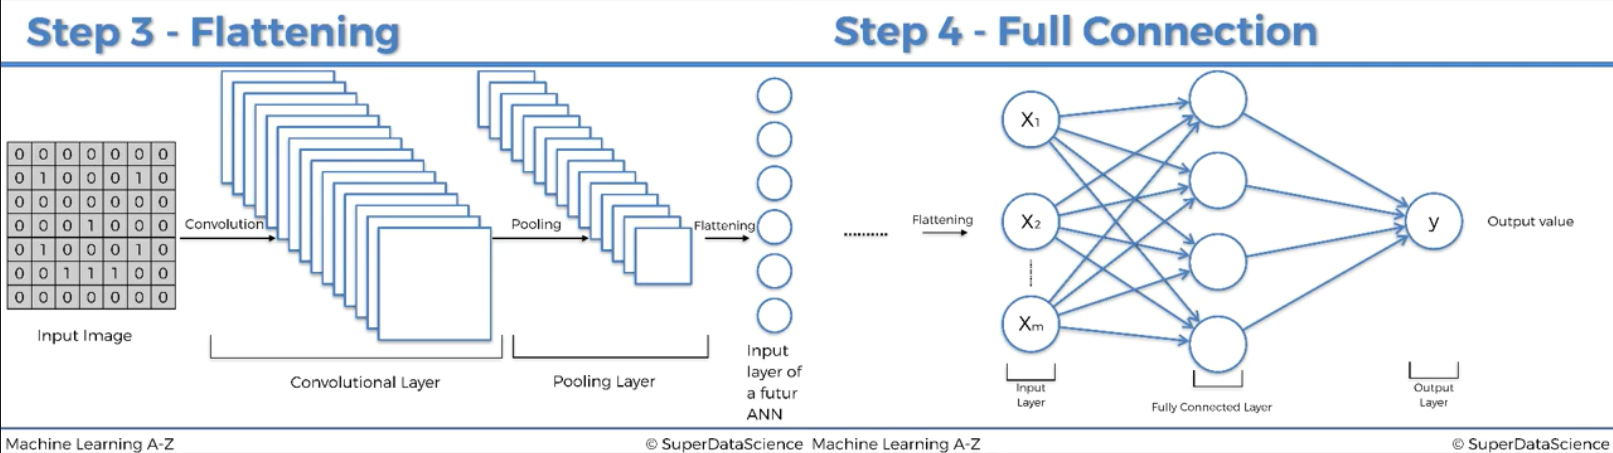

In [12]:
from IPython.display import Image

Image("cnn_picture.png")

In [8]:
# Compiling the CNN

# if we had more than two outcomes(cats, dogs, birds,...)
# we would need to choose categorical_crossentropy
classifier.compile(optimizer = 'adam',
                   loss      = 'binary_crossentropy',
                   metrics   = ['accuracy'])

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


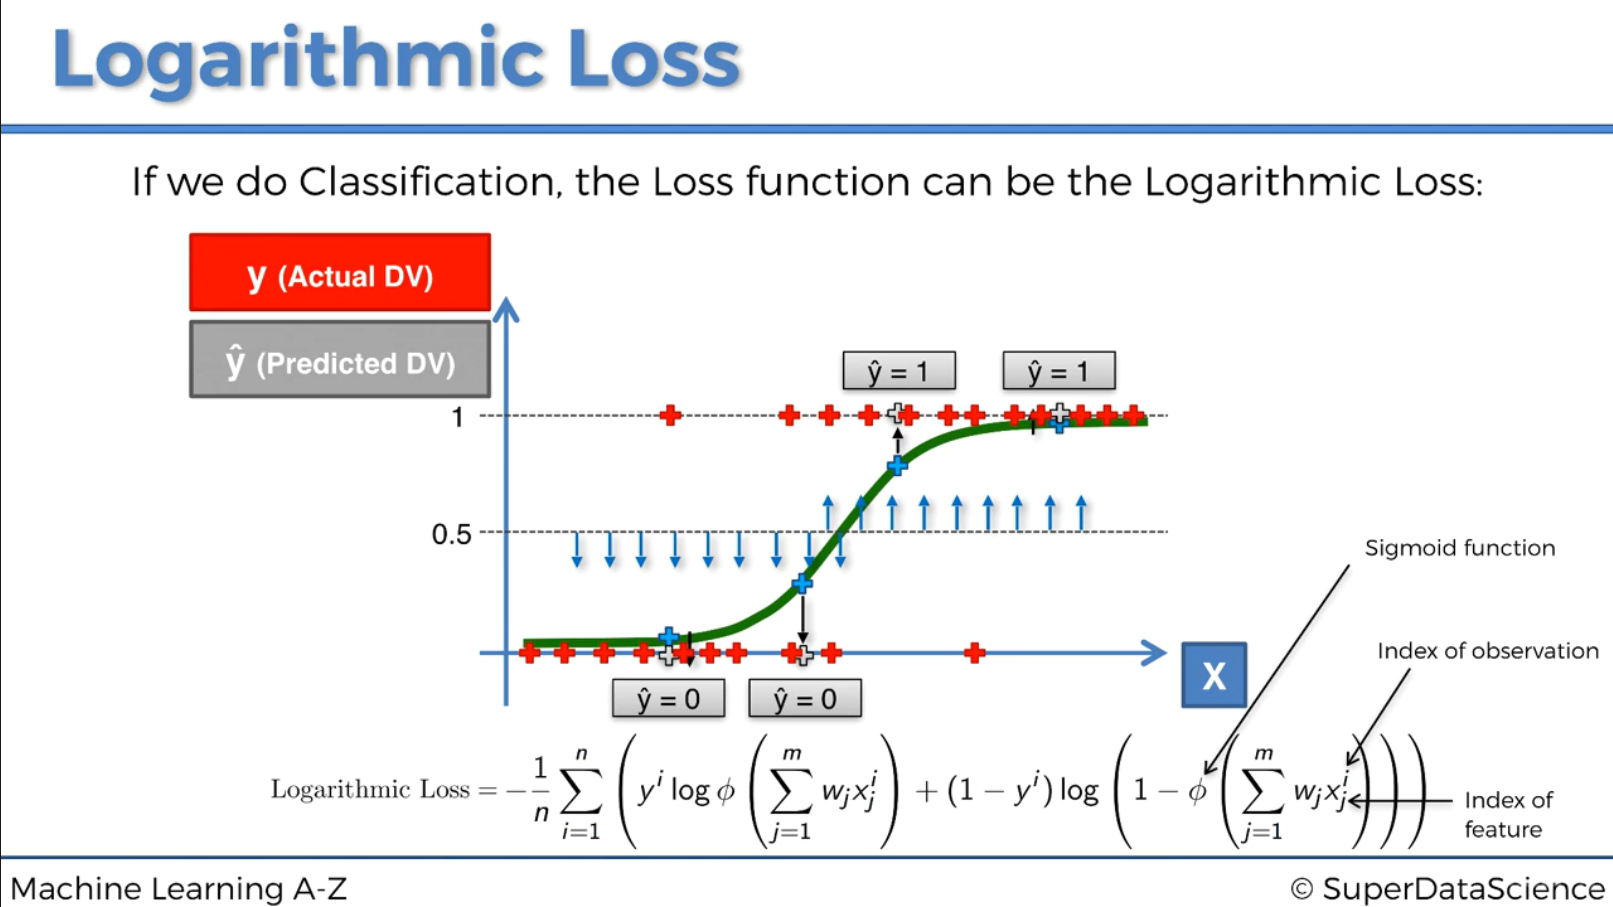

In [14]:
Image("loss.png")

--------------

# Part 2 : Fitting the CNN to the images

In [9]:
from keras.preprocessing.image import ImageDataGenerator

In [10]:
train_datagen = ImageDataGenerator(rescale         = 1./255,
                                   shear_range     = 0.2,
                                   zoom_range      = 0.2,
                                   horizontal_flip = True)

In [11]:
test_datagen = ImageDataGenerator(rescale = 1./255)

In [12]:
training_set = train_datagen.flow_from_directory(directory   = 'dataset/training_set',
                                                 target_size = (64, 64),
                                                 batch_size  = 32,
                                                 class_mode  = 'binary')

Found 8000 images belonging to 2 classes.


In [13]:
test_set = test_datagen.flow_from_directory(directory   = 'dataset/test_set',
                                            target_size = (64, 64),
                                            batch_size  = 32,
                                            class_mode  = 'binary')

Found 2000 images belonging to 2 classes.


In [15]:
classifier.fit_generator(training_set,
                         steps_per_epoch  = 8000, # number of images on the training set
                         epochs           = 5,
                         validation_data  = test_set,
                         validation_steps = 2000 # number of images on the test set
                         )

Epoch 1/5
8000/8000 [==============================] - 2678s 335ms/step - loss: 0.1510 - accuracy: 0.9407 - val_loss: 1.1578 - val_accuracy: 0.7688
Epoch 2/5
8000/8000 [==============================] - 1757s 220ms/step - loss: 0.1046 - accuracy: 0.9611 - val_loss: 1.1805 - val_accuracy: 0.7508
Epoch 3/5
8000/8000 [==============================] - 1823s 228ms/step - loss: 0.0793 - accuracy: 0.9710 - val_loss: 1.1940 - val_accuracy: 0.7625
Epoch 4/5
8000/8000 [==============================] - 1810s 226ms/step - loss: 0.0649 - accuracy: 0.9767 - val_loss: 2.5946 - val_accuracy: 0.7386
Epoch 5/5
8000/8000 [==============================] - 1757s 220ms/step - loss: 0.0547 - accuracy: 0.9808 - val_loss: 1.8475 - val_accuracy: 0.7556


In [ ]:
"""
to increase the accuracy, we need to make a deeper deep learning model
we have 2 options;
1) add another convolutional layer
2) add another fully connected layer.
"""

In [19]:
classifier = Sequential()

#---------------------------------------------------------------------------------------
# adding first convolutional layer
classifier.add(Convolution2D(32, 3, 3, input_shape = (64, 64, 3), activation = 'relu'))
classifier.add(MaxPooling2D(pool_size = (2, 2)))
#---------------------------------------------------------------------------------------

#---------------------------------------------------------------------------------------
# adding second convolutional layer
classifier.add(Convolution2D(32, 3, 3, activation = 'relu'))
classifier.add(MaxPooling2D(pool_size = (2, 2)))
#---------------------------------------------------------------------------------------

#---------------------------------------------------------------------------------------
# adding third convolutional layer
classifier.add(Convolution2D(64, 3, 3, activation = 'relu'))
classifier.add(MaxPooling2D(pool_size = (2, 2)))
#---------------------------------------------------------------------------------------

classifier.add(Flatten())

classifier.add(Dense(128,activation = 'relu'))

classifier.add(Dense(1, activation = 'sigmoid'))

classifier.compile(optimizer = 'adam',
                   loss      = 'binary_crossentropy',
                   metrics   = ['accuracy'])

C:\Users\Sefa3\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(32, (3, 3), input_shape=(64, 64, 3..., activation="relu")`
  """
C:\Users\Sefa3\Anaconda3\lib\site-packages\ipykernel_launcher.py:11: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(32, (3, 3), activation="relu")`
  # This is added back by InteractiveShellApp.init_path()
C:\Users\Sefa3\Anaconda3\lib\site-packages\ipykernel_launcher.py:17: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(64, (3, 3), activation="relu")`


In [20]:
train_datagen = ImageDataGenerator(rescale         = 1./255,
                                   shear_range     = 0.2,
                                   zoom_range      = 0.2,
                                   horizontal_flip = True)

test_datagen = ImageDataGenerator(rescale = 1./255)

training_set = train_datagen.flow_from_directory(directory   = 'dataset/training_set',
                                                 target_size = (64, 64),
                                                 batch_size  = 32,
                                                 class_mode  = 'binary')

test_set = test_datagen.flow_from_directory(directory   = 'dataset/test_set',
                                            target_size = (64, 64),
                                            batch_size  = 32,
                                            class_mode  = 'binary')

Found 8000 images belonging to 2 classes.
Found 2000 images belonging to 2 classes.


In [21]:
classifier.fit_generator(training_set,
                         steps_per_epoch  = 8000,
                         epochs           = 7,
                         validation_data  = test_set,
                         validation_steps = 2000
                         )

Epoch 1/7
8000/8000 [==============================] - 1724s 216ms/step - loss: 0.3752 - accuracy: 0.8207 - val_loss: 0.1994 - val_accuracy: 0.8136
Epoch 2/7
8000/8000 [==============================] - 1688s 211ms/step - loss: 0.1233 - accuracy: 0.9515 - val_loss: 0.6829 - val_accuracy: 0.8208
Epoch 3/7
8000/8000 [==============================] - 1566s 196ms/step - loss: 0.0626 - accuracy: 0.9769 - val_loss: 0.3639 - val_accuracy: 0.8204
Epoch 4/7
8000/8000 [==============================] - 1564s 195ms/step - loss: 0.0449 - accuracy: 0.9839 - val_loss: 1.1964 - val_accuracy: 0.8143
Epoch 5/7
8000/8000 [==============================] - 1564s 195ms/step - loss: 0.0362 - accuracy: 0.9874 - val_loss: 0.7904 - val_accuracy: 0.8135
Epoch 6/7
8000/8000 [==============================] - 1565s 196ms/step - loss: 0.0296 - accuracy: 0.9897 - val_loss: 2.7359 - val_accuracy: 0.8255
Epoch 7/7
8000/8000 [==============================] - 1782s 223ms/step - loss: 0.0277 - accuracy: 0.9904 - val_

--------------

# Part 3 : Making new predictions

In [22]:
import numpy as np

from keras.preprocessing import image

In [23]:
test_image = image.load_img('dataset/single_prediction/cat_or_dog_1.jpg', target_size = (64, 64))

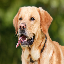

In [25]:
test_image

In [31]:
test_image_array = image.img_to_array(test_image)

test_image_array

array([[[ 54.,  58.,   7.],
        [ 58.,  63.,   9.],
        [ 64.,  67.,  10.],
        ...,
        [136., 144.,  71.],
        [140., 150.,  77.],
        [139., 149.,  78.]],

       [[ 48.,  54.,   6.],
        [ 51.,  58.,   7.],
        [ 58.,  63.,   9.],
        ...,
        [129., 137.,  64.],
        [139., 149.,  78.],
        [141., 151.,  80.]],

       [[ 48.,  56.,   7.],
        [ 48.,  56.,   7.],
        [ 54.,  61.,  10.],
        ...,
        [123., 130.,  63.],
        [136., 145.,  80.],
        [140., 149.,  82.]],

       ...,

       [[ 46.,  55.,  12.],
        [ 42.,  50.,   9.],
        [ 38.,  49.,   9.],
        ...,
        [239., 205., 170.],
        [235., 209., 186.],
        [229., 202., 173.]],

       [[ 50.,  57.,  15.],
        [ 42.,  50.,   9.],
        [ 44.,  52.,  11.],
        ...,
        [234., 200., 162.],
        [236., 206., 178.],
        [234., 203., 174.]],

       [[ 53.,  59.,  13.],
        [ 43.,  51.,  10.],
        [ 49.,  

In [32]:
test_image_array.shape

(64, 64, 3)

In [33]:
classifier.predict(test_image_array)

ValueError: Error when checking input: expected conv2d_5_input to have 4 dimensions, but got array with shape (64, 64, 3)

In [34]:
test_image_dim = np.expand_dims(test_image_array, axis = 0)

test_image_dim

array([[[[ 54.,  58.,   7.],
         [ 58.,  63.,   9.],
         [ 64.,  67.,  10.],
         ...,
         [136., 144.,  71.],
         [140., 150.,  77.],
         [139., 149.,  78.]],

        [[ 48.,  54.,   6.],
         [ 51.,  58.,   7.],
         [ 58.,  63.,   9.],
         ...,
         [129., 137.,  64.],
         [139., 149.,  78.],
         [141., 151.,  80.]],

        [[ 48.,  56.,   7.],
         [ 48.,  56.,   7.],
         [ 54.,  61.,  10.],
         ...,
         [123., 130.,  63.],
         [136., 145.,  80.],
         [140., 149.,  82.]],

        ...,

        [[ 46.,  55.,  12.],
         [ 42.,  50.,   9.],
         [ 38.,  49.,   9.],
         ...,
         [239., 205., 170.],
         [235., 209., 186.],
         [229., 202., 173.]],

        [[ 50.,  57.,  15.],
         [ 42.,  50.,   9.],
         [ 44.,  52.,  11.],
         ...,
         [234., 200., 162.],
         [236., 206., 178.],
         [234., 203., 174.]],

        [[ 53.,  59.,  13.],
       

In [35]:
test_image_dim.shape

(1, 64, 64, 3)

In [39]:
result = classifier.predict(test_image_dim)

result

array([[1.]], dtype=float32)

In [40]:
training_set.class_indices

{'cats': 0, 'dogs': 1}

In [41]:
result.shape

(1, 1)

In [42]:
if result[0][0] == 1:
    prediction = 'dog'
else:
    prediction = 'cat'

In [43]:
prediction

'dog'

- - - - 

In [48]:
training_set.class_indices

{'cats': 0, 'dogs': 1}

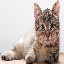

In [58]:
test_image = image.load_img('dataset/single_prediction/cat_or_dog_2.jpg', target_size = (64, 64))

test_image

In [59]:
test_image = image.img_to_array(test_image)

test_image

array([[[239., 239., 239.],
        [239., 239., 239.],
        [239., 239., 239.],
        ...,
        [245., 245., 245.],
        [245., 245., 245.],
        [245., 245., 245.]],

       [[239., 239., 239.],
        [239., 239., 239.],
        [239., 239., 239.],
        ...,
        [245., 245., 245.],
        [245., 245., 245.],
        [244., 244., 244.]],

       [[239., 239., 239.],
        [239., 239., 239.],
        [239., 239., 239.],
        ...,
        [244., 244., 244.],
        [244., 244., 244.],
        [244., 244., 244.]],

       ...,

       [[241., 217., 205.],
        [243., 220., 206.],
        [241., 219., 205.],
        ...,
        [227., 200., 181.],
        [233., 205., 191.],
        [232., 215., 197.]],

       [[255., 237., 227.],
        [251., 234., 227.],
        [252., 235., 227.],
        ...,
        [219., 193., 178.],
        [219., 193., 180.],
        [216., 189., 172.]],

       [[243., 230., 222.],
        [250., 235., 228.],
        [246., 2

In [60]:
test_image = np.expand_dims(test_image, axis = 0)

test_image

array([[[[239., 239., 239.],
         [239., 239., 239.],
         [239., 239., 239.],
         ...,
         [245., 245., 245.],
         [245., 245., 245.],
         [245., 245., 245.]],

        [[239., 239., 239.],
         [239., 239., 239.],
         [239., 239., 239.],
         ...,
         [245., 245., 245.],
         [245., 245., 245.],
         [244., 244., 244.]],

        [[239., 239., 239.],
         [239., 239., 239.],
         [239., 239., 239.],
         ...,
         [244., 244., 244.],
         [244., 244., 244.],
         [244., 244., 244.]],

        ...,

        [[241., 217., 205.],
         [243., 220., 206.],
         [241., 219., 205.],
         ...,
         [227., 200., 181.],
         [233., 205., 191.],
         [232., 215., 197.]],

        [[255., 237., 227.],
         [251., 234., 227.],
         [252., 235., 227.],
         ...,
         [219., 193., 178.],
         [219., 193., 180.],
         [216., 189., 172.]],

        [[243., 230., 222.],
       

In [61]:
result     = classifier.predict(test_image)

result

array([[1.]], dtype=float32)

In [62]:
if result[0][0] == 1:
    prediction = 'dog'
else:
    prediction = 'cat'

In [63]:
prediction

'dog'

In [50]:
result

array([[1.]], dtype=float32)

-------------